In [347]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [348]:
 data = pd.read_excel(r"D:\assignment\PROPERTY 2001 TO 2020.xls")

# Data Preprocessing 

In [349]:
data['Crime Head'].unique()

array(['DACOITY', 'ROBBERY', 'BURGLARY', 'THEFTS', 'C.B. OF TRUST',
       'OTHER KINDS OF PROP. OFF.', 'TOTAL (MANUAL)',
       'COMP. TOTAL (6 TO 15)', 'Theft', 'Burglary', 'Robbery', 'Dacoity',
       'OTHER'], dtype=object)

In [279]:
data['Crime Head'] = data['Crime Head'].replace('THEFTS', 'Theft')
data['Crime Head'] = data['Crime Head'].replace('BURGLARY', 'Burglary')
data['Crime Head'] = data['Crime Head'].replace('ROBBERY', 'Robbery')
data['Crime Head'] = data['Crime Head'].replace('DACOITY', 'Dacoity')
data['Crime Head'] = data['Crime Head'].replace('OTHER KINDS OF PROP', 'OTHER')

In [280]:
data['Crime Head'].unique()

array(['Dacoity', 'Robbery', 'Burglary', 'Theft', 'C.B. OF TRUST',
       'OTHER KINDS OF PROP. OFF.', 'TOTAL (MANUAL)',
       'COMP. TOTAL (6 TO 15)', 'OTHER'], dtype=object)

In [281]:
data['Crime Head'].value_counts()

Dacoity                      599
Robbery                      599
Burglary                     599
Theft                        599
C.B. OF TRUST                455
OTHER KINDS OF PROP. OFF.    455
TOTAL (MANUAL)               454
OTHER                        144
COMP. TOTAL (6 TO 15)         39
Name: Crime Head, dtype: int64

In [282]:
data1 = data[data['Crime Head'] !='COMP. TOTAL (6 TO 15)']

In [283]:
data1

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered
0,Andhra Pradesh,2001,Dacoity,203,2.912770e+07,1.261649e+07
1,Andhra Pradesh,2001,Robbery,622,2.287228e+07,7.149310e+06
2,Andhra Pradesh,2001,Burglary,7134,1.470193e+08,5.148344e+07
3,Andhra Pradesh,2001,Theft,16435,2.241045e+08,1.082587e+08
4,Andhra Pradesh,2001,C.B. OF TRUST,316,4.512826e+07,3.301479e+06
...,...,...,...,...,...,...
3938,Delhi,2020,OTHER,1059,2.518652e+01,1.575630e+00
3939,Jammu & Kashmir,2020,OTHER,0,0.000000e+00,0.000000e+00
3940,Ladakh,2020,OTHER,0,0.000000e+00,0.000000e+00
3941,Lakshadweep,2020,OTHER,0,0.000000e+00,0.000000e+00


# distribution of data

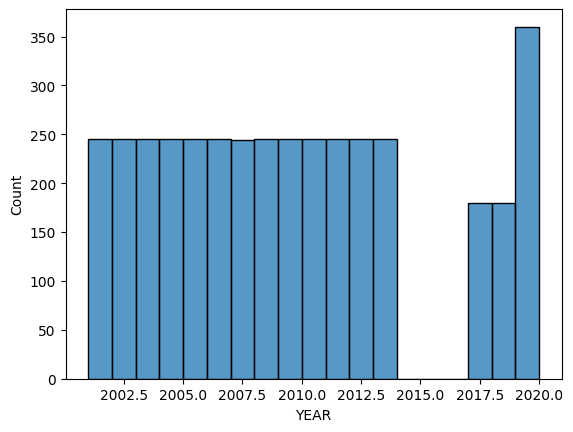

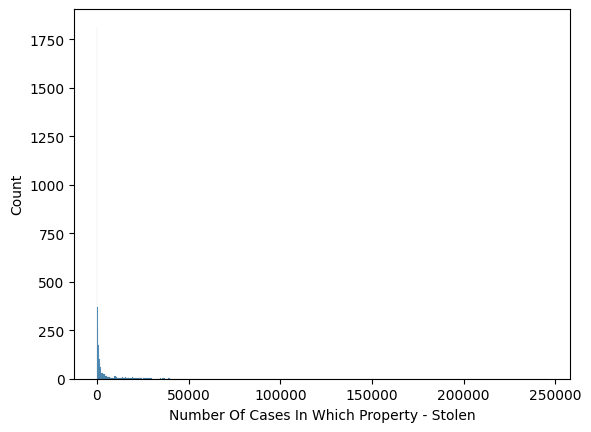

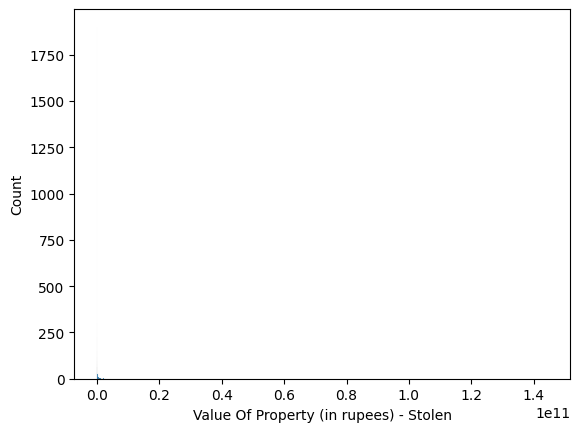

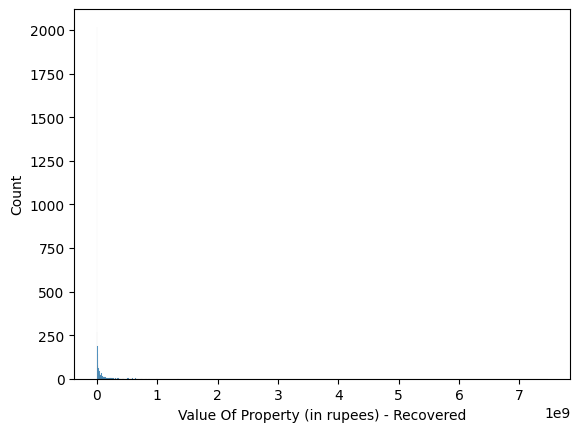

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data1.columns:
    if data1[column].dtypes != 'object':
        sns.histplot(data=data1, x=column)
        plt.show()

# Spread of dataset

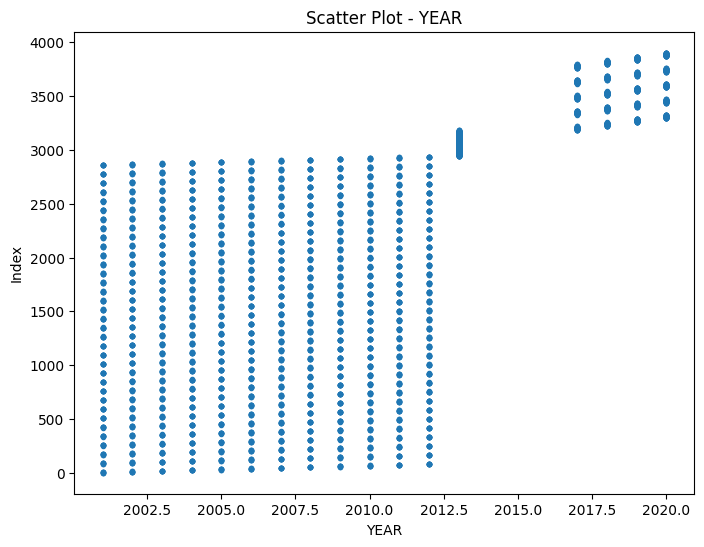

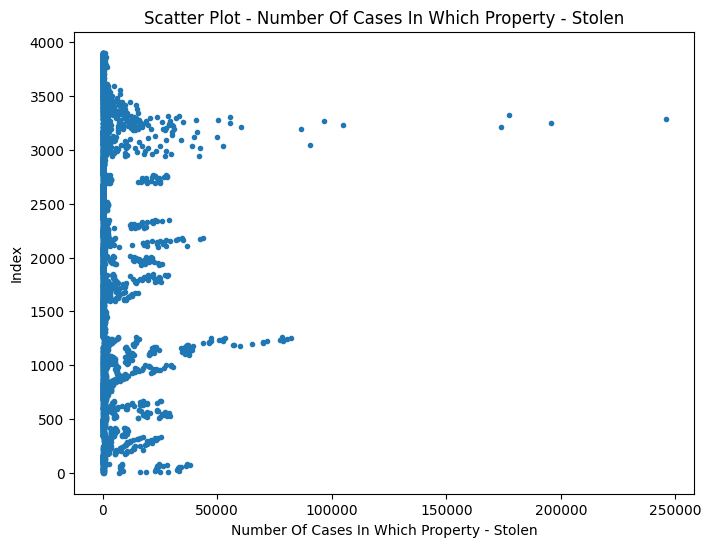

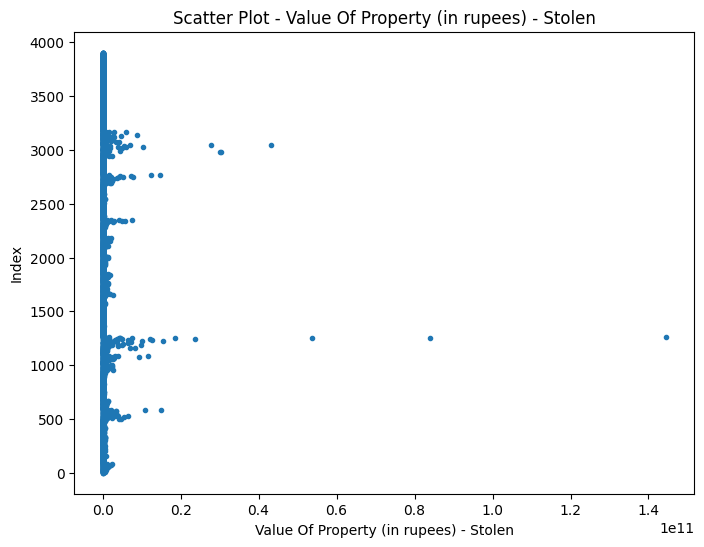

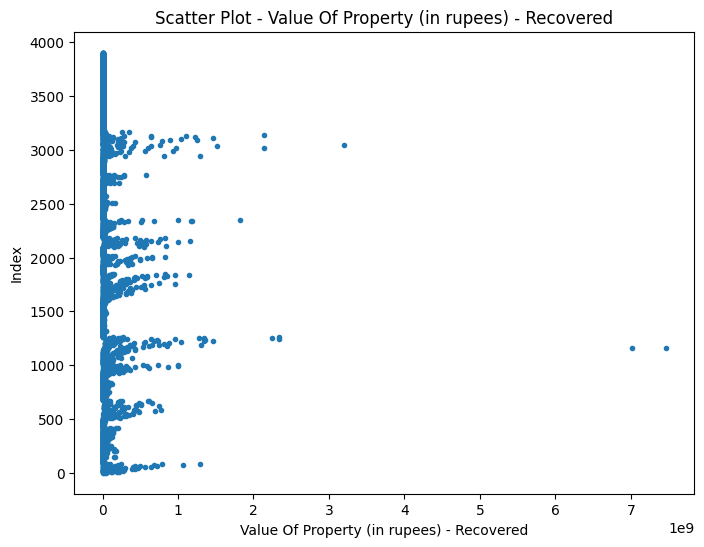

In [285]:
import matplotlib.pyplot as plt

for column in data1.columns:
    if data1[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(data1[column], range(len(data1)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()

# outliers removal 

In [286]:
import numpy as np

In [287]:
mean = np.mean(data1)
std = np.std(data1)
threshold = 3
z_scores = (data1 - mean) / std

C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [288]:
outliers = data1[np.abs(z_scores) > threshold]
df9 = data1[~data1.isin(outliers)].dropna()

In [289]:
df9.shape

(3806, 6)

In [290]:
data1.shape

(3904, 6)

In [291]:
# Loss of data

In [292]:
(3904-3806)/3806*100


2.5748817656332106

In [293]:
df9.isnull().sum()

STATE/UT                                      0
YEAR                                          0
Crime Head                                    0
Number Of Cases In Which Property - Stolen    0
Value Of Property (in rupees) - Stolen        0
Value Of Property (in rupees) - Recovered     0
dtype: int64

# after removing outliers

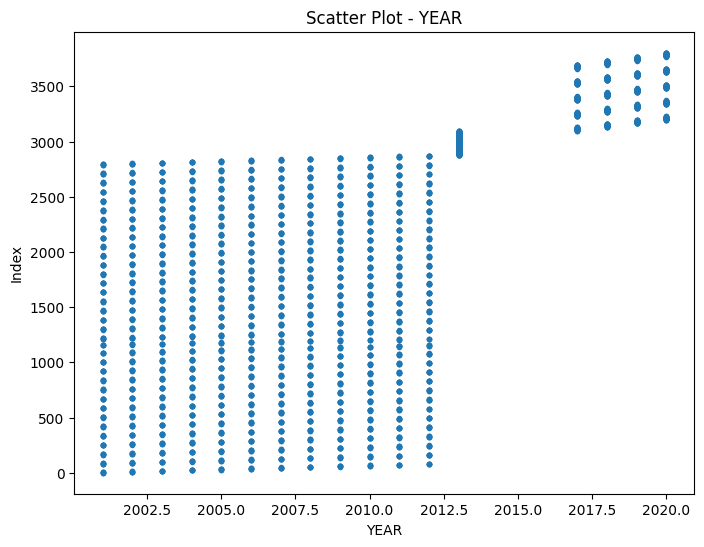

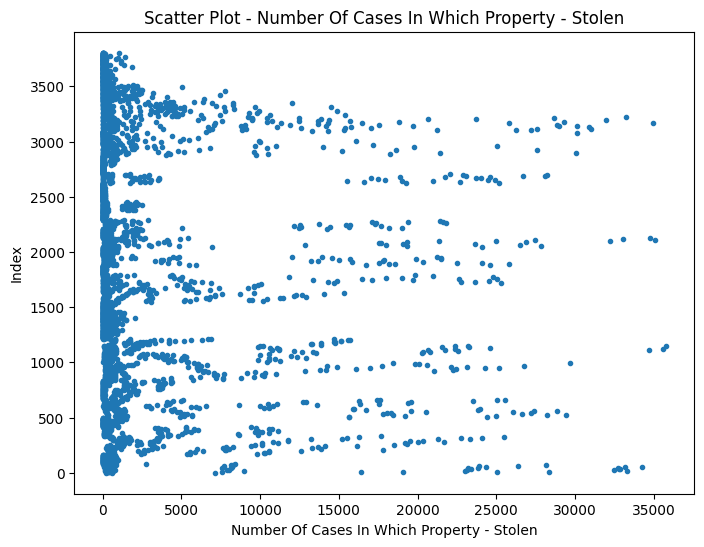

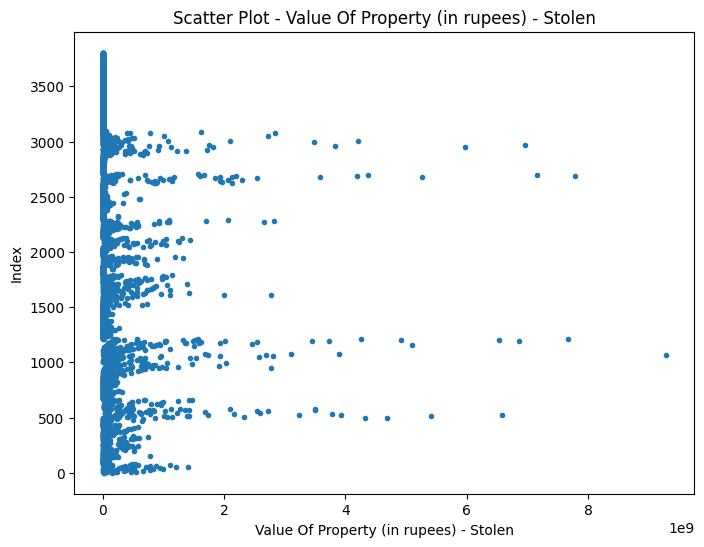

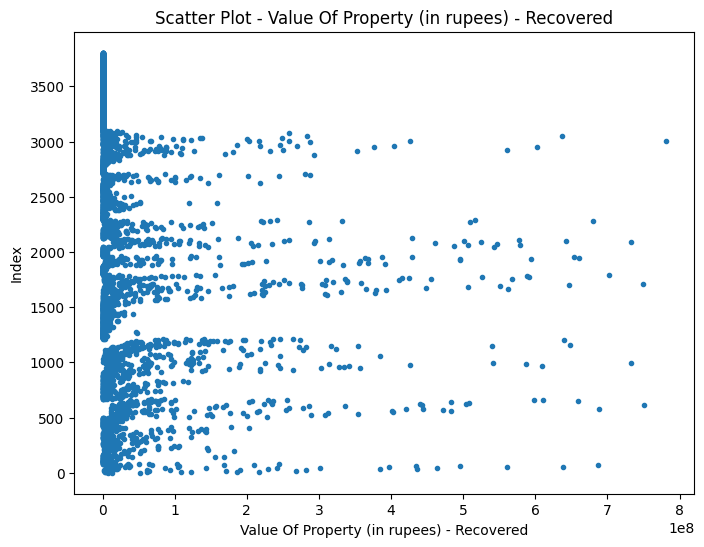

In [294]:
import matplotlib.pyplot as plt

for column in df9.columns:
    if df9[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(df9[column], range(len(df9)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()

# encoding

In [295]:
df0 = df9.copy()

In [296]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df0['STATE/UT'] = label.fit_transform(df['STATE/UT'])
df0['Crime Head'] = label.fit_transform(df['Crime Head'])

In [297]:
df0

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered
0,1,2001,2,203.0,2.912770e+07,1.261649e+07
1,1,2001,5,622.0,2.287228e+07,7.149310e+06
2,1,2001,0,7134.0,1.470193e+08,5.148344e+07
3,1,2001,7,16435.0,2.241045e+08,1.082587e+08
4,1,2001,1,316.0,4.512826e+07,3.301479e+06
...,...,...,...,...,...,...
3938,10,2020,3,1059.0,2.518652e+01,1.575630e+00
3939,16,2020,3,0.0,0.000000e+00,0.000000e+00
3940,20,2020,3,0.0,0.000000e+00,0.000000e+00
3941,21,2020,3,0.0,0.000000e+00,0.000000e+00


# Normalisation of data

In [298]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer

In [299]:
ss = RobustScaler()
scaled= pd.DataFrame(ss.fit_transform(df0))

# after Normalisation spread of data

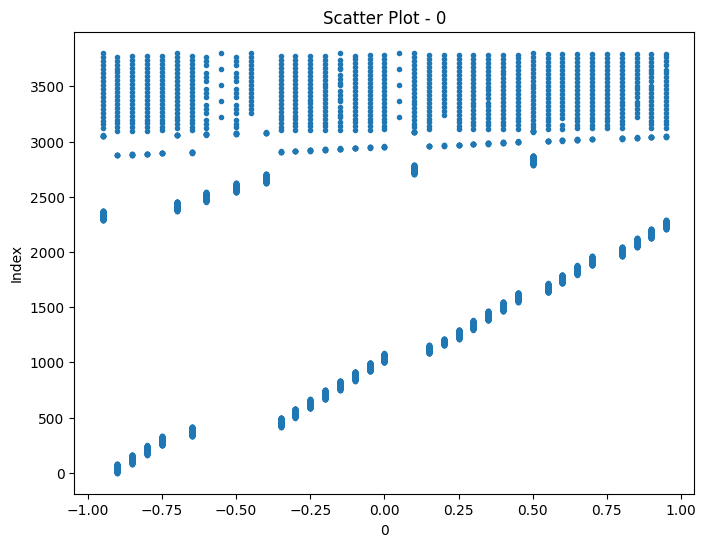

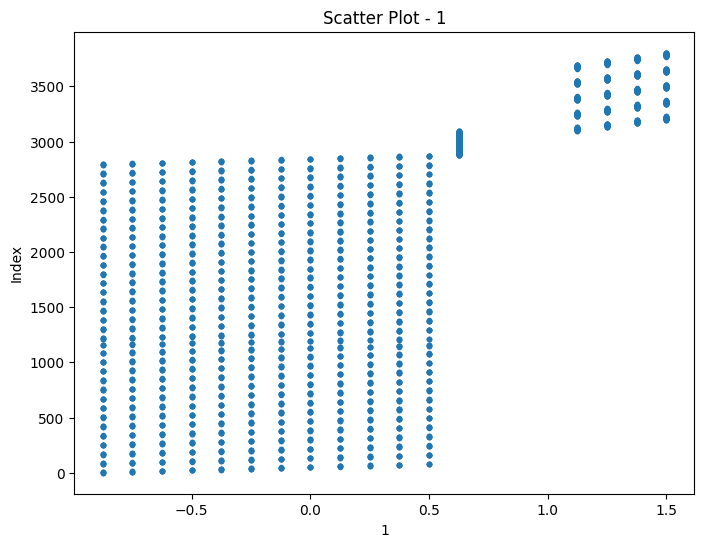

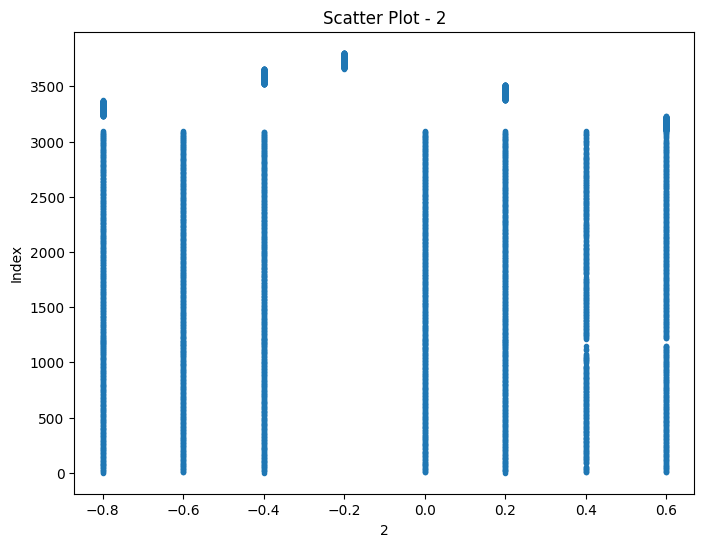

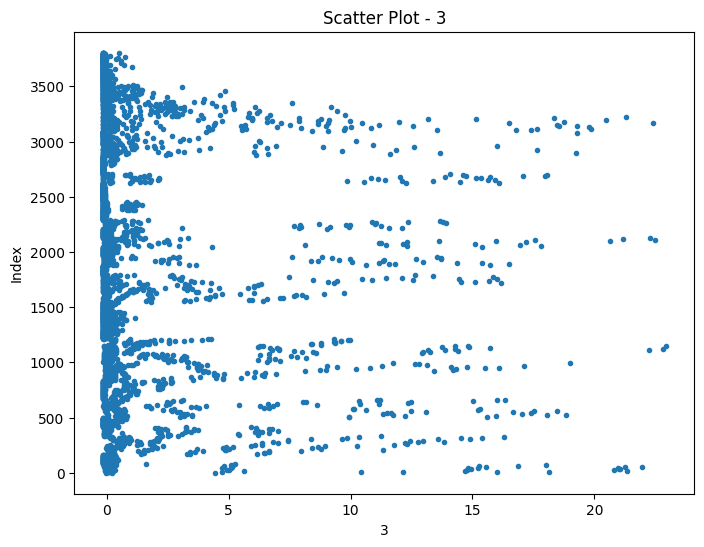

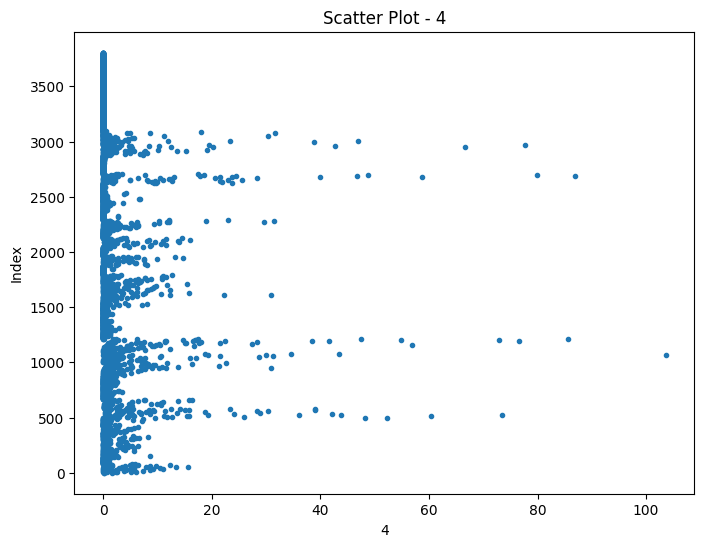

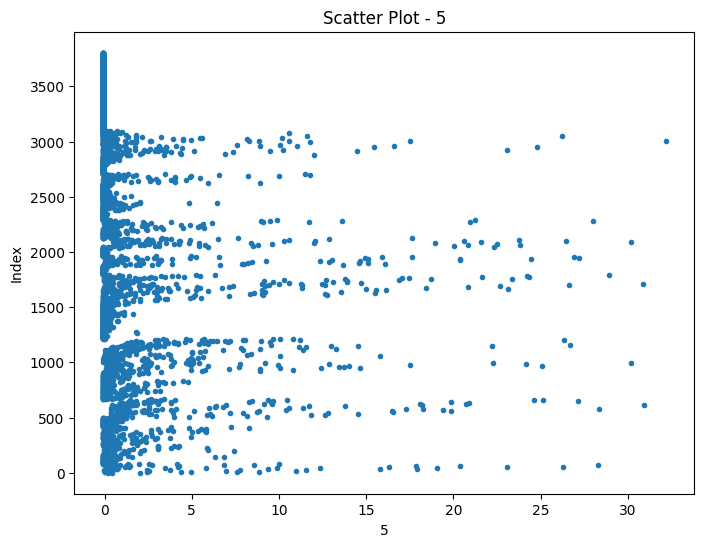

In [300]:


import matplotlib.pyplot as plt

for column in scaled.columns:
    if scaled[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(scaled[column], range(len(scaled)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()

# Elbow Method

In [301]:
from sklearn.cluster import KMeans

In [302]:
elbow = pd.DataFrame()

for i in range(1,15):
    kmean = KMeans(n_clusters=i, random_state=333)
    model = kmean.fit(scaled)
    elbow.at[i,'k'] = i
    elbow.at[i, 'inertia'] = round(model.inertia_)/10000000
print(elbow)
    

       k   inertia
1    1.0  0.026430
2    2.0  0.013632
3    3.0  0.008186
4    4.0  0.006401
5    5.0  0.005229
6    6.0  0.004537
7    7.0  0.003951
8    8.0  0.003565
9    9.0  0.003276
10  10.0  0.003010
11  11.0  0.002792
12  12.0  0.002620
13  13.0  0.002491
14  14.0  0.002341


Text(0, 0.5, 'inertia')

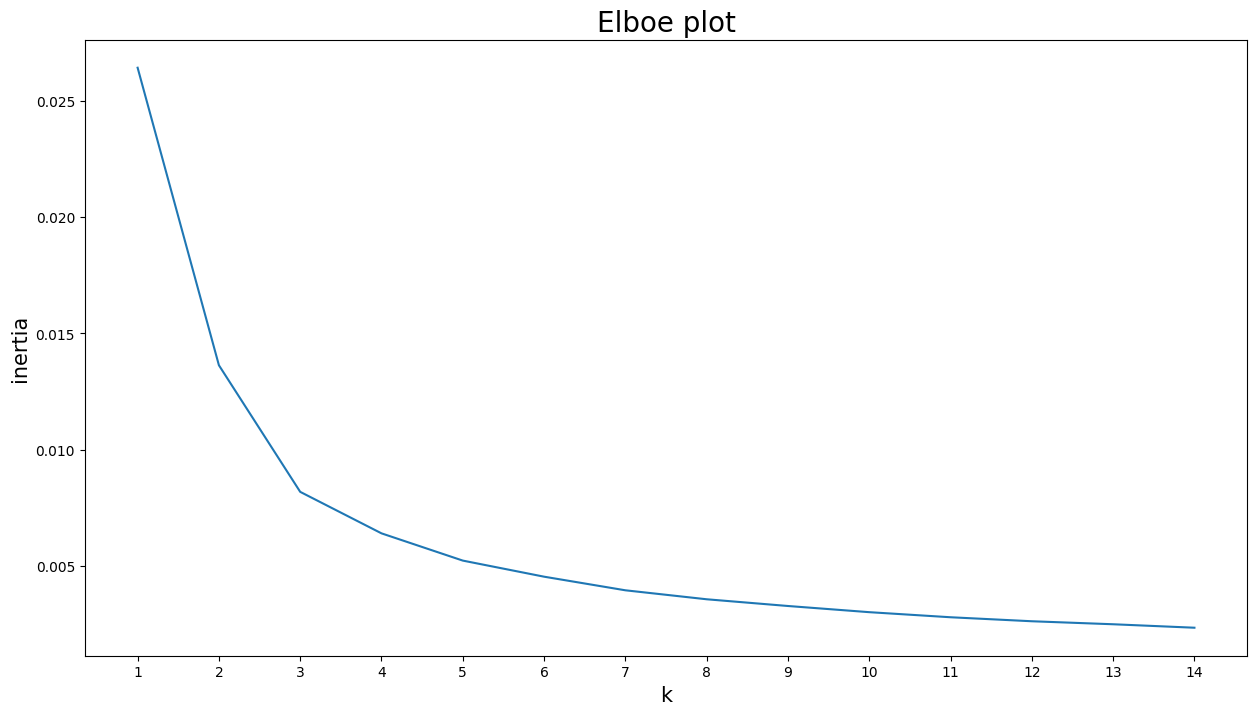

In [303]:
plt.figure(figsize=(15,8))
plt.title('Elboe plot', size=20)
plt.plot(elbow['k'], elbow['inertia'])
plt.xticks(elbow['k'])
plt.xlabel('k', size=15)
plt.ylabel('inertia', size=15)

# model Building 

In [304]:
df1 = pd.DataFrame()
kmeans = KMeans(n_clusters = 3,  random_state = 42)

y_kmeans = kmeans.fit_predict(scaled)

df1['y_kmeans']=y_kmeans

df1['y_kmeans'].value_counts()

0    3439
1     336
2      31
Name: y_kmeans, dtype: int64

In [305]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(df0, y_kmeans)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.8205741880149495


# merging for final

In [306]:
df1['y_kmeans'].unique()

array([0, 1, 2])

In [307]:
df9.shape

(3806, 6)

In [308]:
final = df9

In [309]:
final1 = final.reset_index()
final2 = final1.drop(['index'], axis=1)
final2['sep'] = df1['y_kmeans']

In [310]:
final2

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered,sep
0,Andhra Pradesh,2001,Dacoity,203.0,2.912770e+07,1.261649e+07,0
1,Andhra Pradesh,2001,Robbery,622.0,2.287228e+07,7.149310e+06,0
2,Andhra Pradesh,2001,Burglary,7134.0,1.470193e+08,5.148344e+07,0
3,Andhra Pradesh,2001,Theft,16435.0,2.241045e+08,1.082587e+08,1
4,Andhra Pradesh,2001,C.B. OF TRUST,316.0,4.512826e+07,3.301479e+06,0
...,...,...,...,...,...,...,...
3801,Delhi,2020,OTHER,1059.0,2.518652e+01,1.575630e+00,0
3802,Jammu & Kashmir,2020,OTHER,0.0,0.000000e+00,0.000000e+00,0
3803,Ladakh,2020,OTHER,0.0,0.000000e+00,0.000000e+00,0
3804,Lakshadweep,2020,OTHER,0.0,0.000000e+00,0.000000e+00,0


In [311]:
cluster1 = final2[final2['sep']==0]
cluster2 = final2[final2['sep']==1]
cluster3 = final2[final2['sep']==2]

# EDA for Cluster 1

In [312]:
Cluster1 = cluster1.drop(['sep'], axis=1)

In [313]:
Cluster1

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered
0,Andhra Pradesh,2001,Dacoity,203.0,2.912770e+07,1.261649e+07
1,Andhra Pradesh,2001,Robbery,622.0,2.287228e+07,7.149310e+06
2,Andhra Pradesh,2001,Burglary,7134.0,1.470193e+08,5.148344e+07
4,Andhra Pradesh,2001,C.B. OF TRUST,316.0,4.512826e+07,3.301479e+06
5,Andhra Pradesh,2001,OTHER KINDS OF PROP. OFF.,360.0,7.786220e+06,3.293943e+06
...,...,...,...,...,...,...
3801,Delhi,2020,OTHER,1059.0,2.518652e+01,1.575630e+00
3802,Jammu & Kashmir,2020,OTHER,0.0,0.000000e+00,0.000000e+00
3803,Ladakh,2020,OTHER,0.0,0.000000e+00,0.000000e+00
3804,Lakshadweep,2020,OTHER,0.0,0.000000e+00,0.000000e+00


# highest value Stolen case

In [314]:
Cluster1['Value Of Property (in rupees) - Stolen'].max()

1384990691.0

In [315]:
Cluster1[Cluster1['Value Of Property (in rupees) - Stolen']==1384990691.0]

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered
512,Gujarat,2002,Dacoity,777.0,1.384991e+09,16788842.0


# highest number cases of property reporting state

In [316]:
Cluster1[Cluster1['Number Of Cases In Which Property - Stolen']==23716.0]

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered
3208,Madhya Pradesh,2020,Theft,23716.0,95.101832,53.574927


In [317]:
# as per records, highest number of cases of stolen property reported from madhiya pradesh during 2020 

In [318]:
lowest_cases = Cluster1[Cluster1['Number Of Cases In Which Property - Stolen']==0.0]

<Axes: >

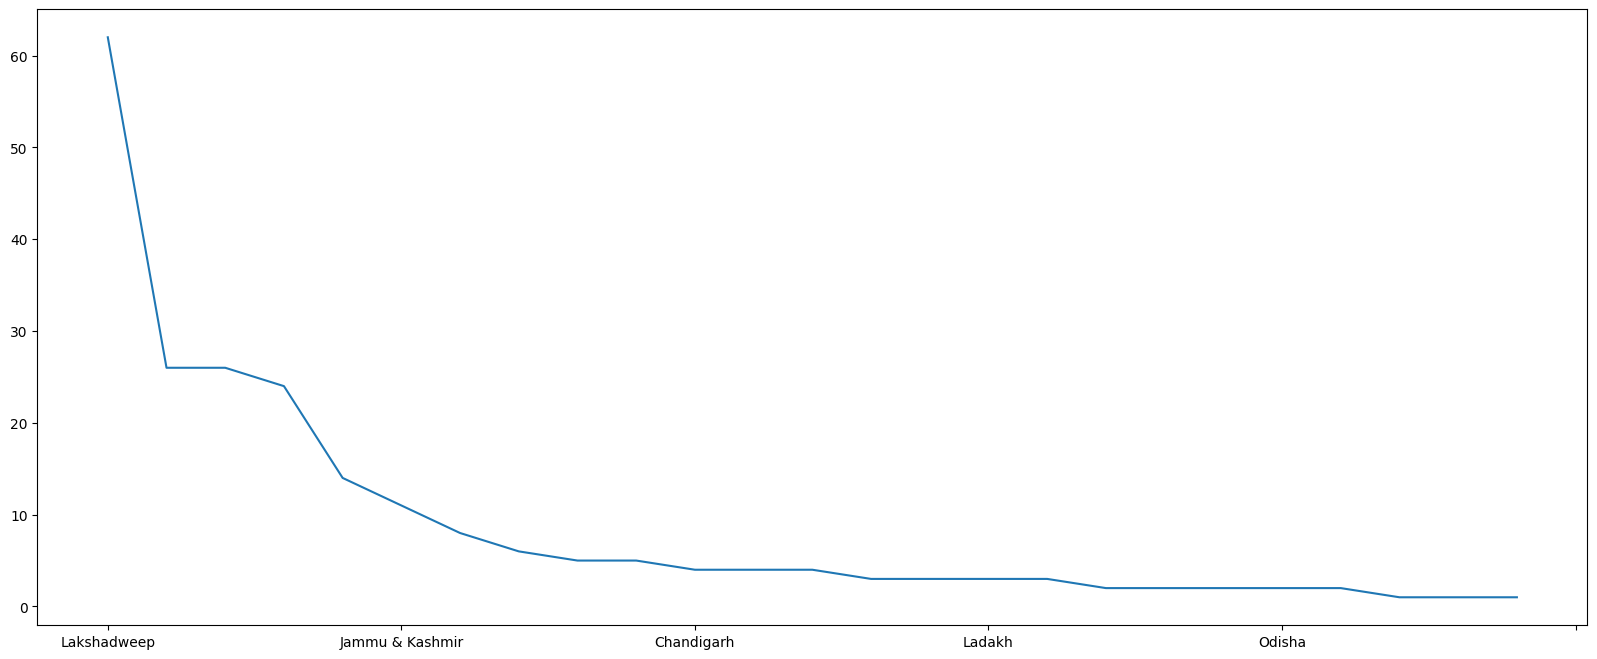

In [319]:
plt.figure(figsize=(20,8))
lowest_cases['STATE/UT'].value_counts().plot()

<Axes: xlabel='STATE/UT'>

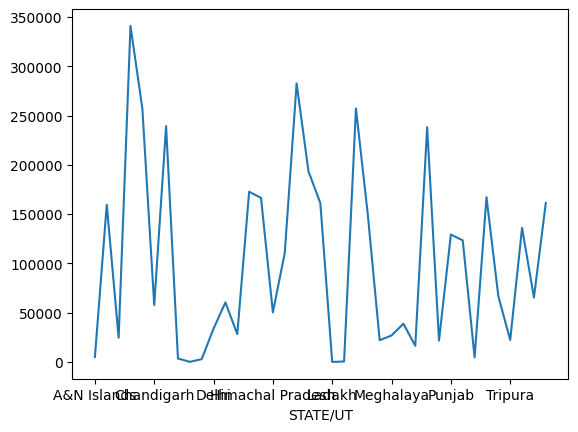

In [350]:
grouped = Cluster1.groupby('STATE/UT')

sum_cases = grouped['Number Of Cases In Which Property - Stolen'].sum()

sum_cases.plot()

<Axes: xlabel='STATE/UT'>

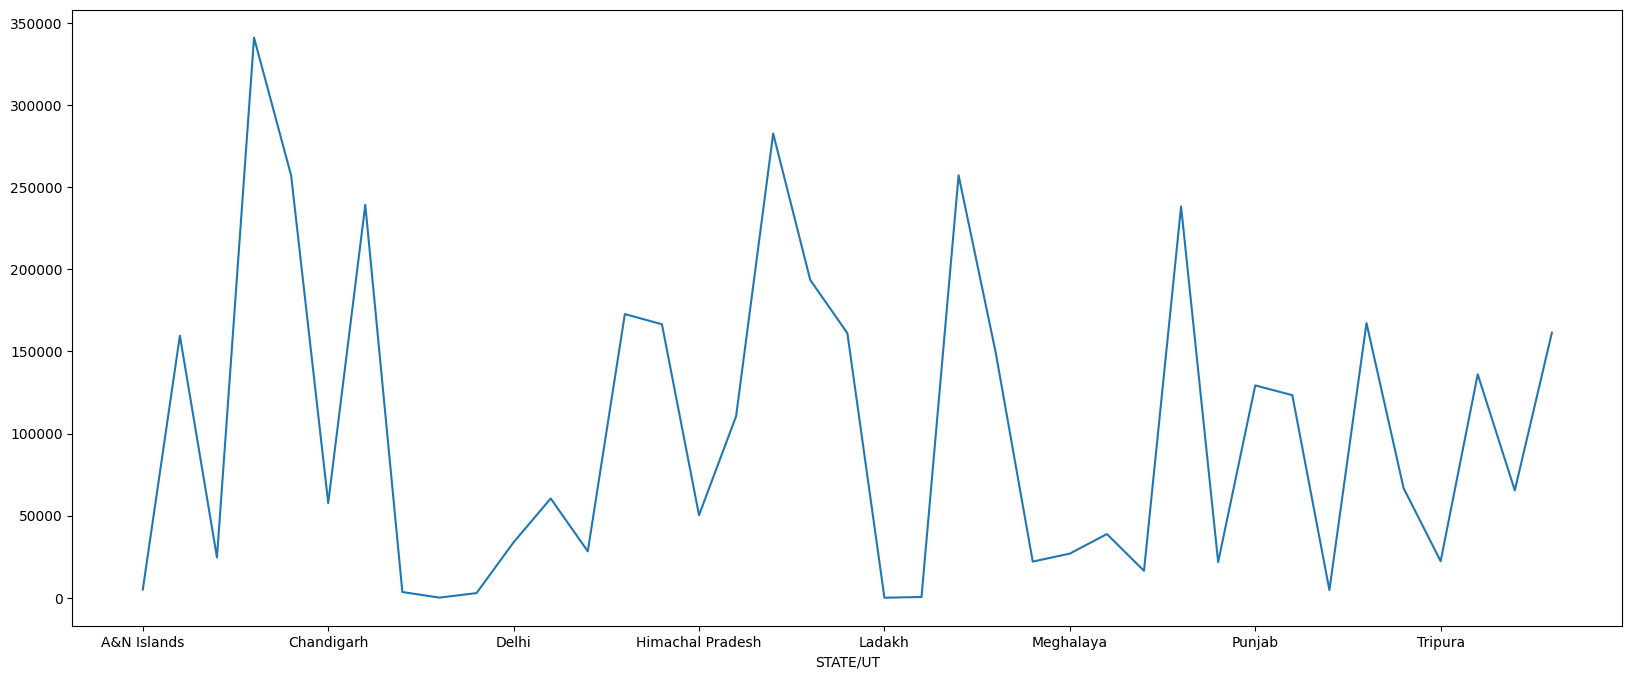

In [321]:
plt.figure(figsize=(20,8))
sum_cases.plot()

# cluster2

In [322]:
cluster2

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered,sep
3,Andhra Pradesh,2001,Theft,16435.0,2.241045e+08,1.082587e+08,1
6,Andhra Pradesh,2001,TOTAL (MANUAL),25070.0,4.760383e+08,1.861034e+08,1
8,Andhra Pradesh,2002,TOTAL (MANUAL),28340.0,5.500110e+08,2.166066e+08,1
10,Andhra Pradesh,2002,Theft,19058.0,2.416288e+08,1.228977e+08,1
14,Andhra Pradesh,2003,TOTAL (MANUAL),33315.0,6.606844e+08,2.684912e+08,1
...,...,...,...,...,...,...,...
3171,Haryana,2019,Theft,25792.0,1.476323e+02,4.035887e+01,1
3177,Madhya Pradesh,2019,Theft,29270.0,1.038932e+02,4.339873e+01,1
3199,Bihar,2020,Theft,31982.0,1.301310e+02,1.206496e+01,1
3215,Rajasthan,2020,Theft,28695.0,1.557574e+02,7.742901e+01,1


# highest value of property stolen

In [256]:
cluster2['Number Of Cases In Which Property - Stolen'].max()

35789.0

In [257]:
cluster2[cluster2['Number Of Cases In Which Property - Stolen']==35789.0]

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered,sep
1148,Madhya Pradesh,2011,TOTAL (MANUAL),35789.0,1.514454e+09,540162210.0,1


# Lowest Number of cases reported

In [323]:
cluster2['Number Of Cases In Which Property - Stolen'].min()

155.0

In [324]:
cluster2[cluster2['Number Of Cases In Which Property - Stolen']==155]

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered,sep
1610,Odisha,2009,OTHER KINDS OF PROP. OFF.,155.0,2.005631e+09,1466800.0,1


In [ ]:
# during 2009, around 155 cases of property stolen reported from Odisha 

# Cluster3

In [ ]:
# highest number of cases and lowest number of cases

In [327]:
cluster3[cluster3['Number Of Cases In Which Property - Stolen']==29407.0]

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered,sep
520,Gujarat,2003,TOTAL (MANUAL),29407.0,3.241930e+09,308623233.0,2


In [328]:
cluster3[cluster3['Number Of Cases In Which Property - Stolen']==56.0]

,STATE/UT,YEAR,Crime Head,Number Of Cases In Which Property - Stolen,Value Of Property (in rupees) - Stolen,Value Of Property (in rupees) - Recovered,sep
493,Goa,2012,C.B. OF TRUST,56.0,4.328066e+09,907705.0,2
